# Fashion MNIST dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from collections import Counter


In [3]:
fashion_mnist_df = pd.read_csv("../datasets/archive/fashion-mnist_train.csv")
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)
fashion_mnist_df.shape

(18000, 785)

In [6]:
LOOKUP = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [7]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28, 28))

In [8]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [9]:
X.shape

(18000, 784)

In [10]:
Y.head()

0    3
1    5
2    1
3    4
4    4
Name: label, dtype: int64

In [11]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,  28, 105, 144, 156, 159, 159, 147,
       151, 105, 123, 123, 161, 141, 145,  86,  21,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 156, 166, 159, 127, 147,
       173, 191, 249, 107, 102,  48, 127, 164, 141, 172, 173,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 215, 180,
       194, 162, 147, 105,  73, 138, 155, 169, 162, 165, 201, 199, 190,
        10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 186,
       201, 182, 211, 210, 184, 235, 101, 144, 205])

Actual label:  Trouser


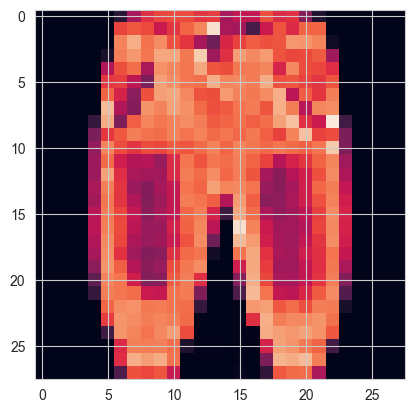

In [12]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Trouser


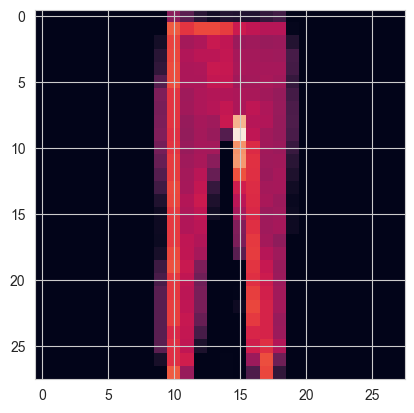

In [13]:
display_image(X.loc[200].values, Y.loc[200])

In [14]:
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207843,...,0.184314,0.000000,0.007843,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.341176,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.015686,0.000000,0.000000,0.505882,0.552941,0.00000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.000000,0.003922,0.000000,0.341176,0.862745,0.87451,0.270588,0.0,0.0,0.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.shape[0]

14400

In [63]:
# model = KMeans(n_clusters=10, init=np.random.rand(10, 784), n_init=1, max_iter=10000, random_state=42)
# model.fit(x_train, y_train)


# Initialize the KMeans model
model = KMeans(n_clusters=10,  n_init=20, max_iter=3000, random_state=42)

# Fit the model to the training data
model.fit(x_train)

labels = model.labels_
cluster_counts = Counter(labels)

print("Cluster centers shape:", model.cluster_centers_.shape)
print("First 10 labels:", labels[:10])

print("Number of data points in each cluster:")
for cluster_id in range(10):
    count = cluster_counts.get(cluster_id, 0)
    print(f"Cluster {cluster_id}: {count} points")

Cluster centers shape: (10, 784)
First 10 labels: [6 6 5 3 8 0 2 6 8 1]
Number of data points in each cluster:
Cluster 0: 2321 points
Cluster 1: 1859 points
Cluster 2: 1766 points
Cluster 3: 643 points
Cluster 4: 525 points
Cluster 5: 1588 points
Cluster 6: 1840 points
Cluster 7: 687 points
Cluster 8: 2108 points
Cluster 9: 1063 points


In [64]:
for idx in range(1):
    cluster_indices = np.where(labels == idx)[0]
    print(f"Cluster {idx} indices: {cluster_indices[:10]}")
    for i in cluster_indices[:10]:
        print(f'label {LOOKUP[Y.loc[i]]}')  # Print first 10 indices of each cluster


Cluster 0 indices: [ 5 12 14 19 23 41 46 48 54 59]
label Trouser
label Sandal
label Dress
label Pullover
label Ankle boot
label Pullover
label Coat
label Coat
label Sandal
label Bag


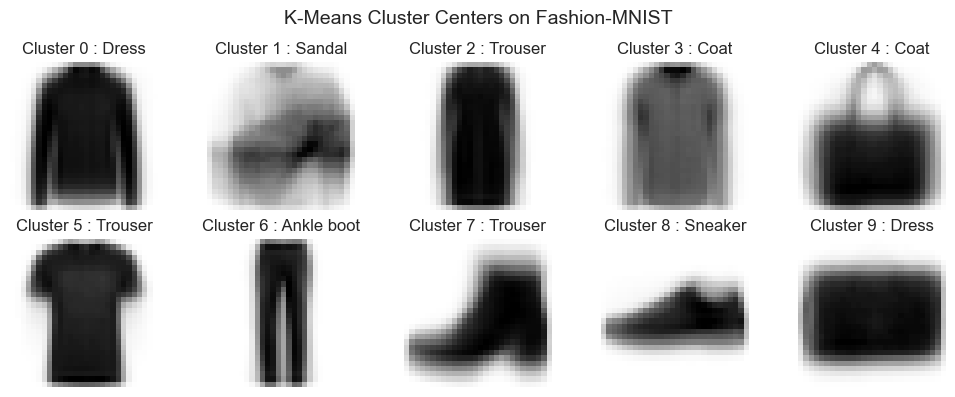

In [45]:
import matplotlib.pyplot as plt

# Parameters for grid layout
num_clusters = 10
rows = 2
cols = 5

# Create the plot
fig, axes = plt.subplots(rows, cols, figsize=(10, 4))
fig.suptitle('K-Means Cluster Centers on Fashion-MNIST', fontsize=14)


for i in range(rows * cols):
    ax = axes[i // cols, i % cols]
    center_image = model.cluster_centers_[i].reshape(28, 28)
    ax.imshow(center_image, cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(f'Cluster {i} : {LOOKUP[Y[i]]}')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

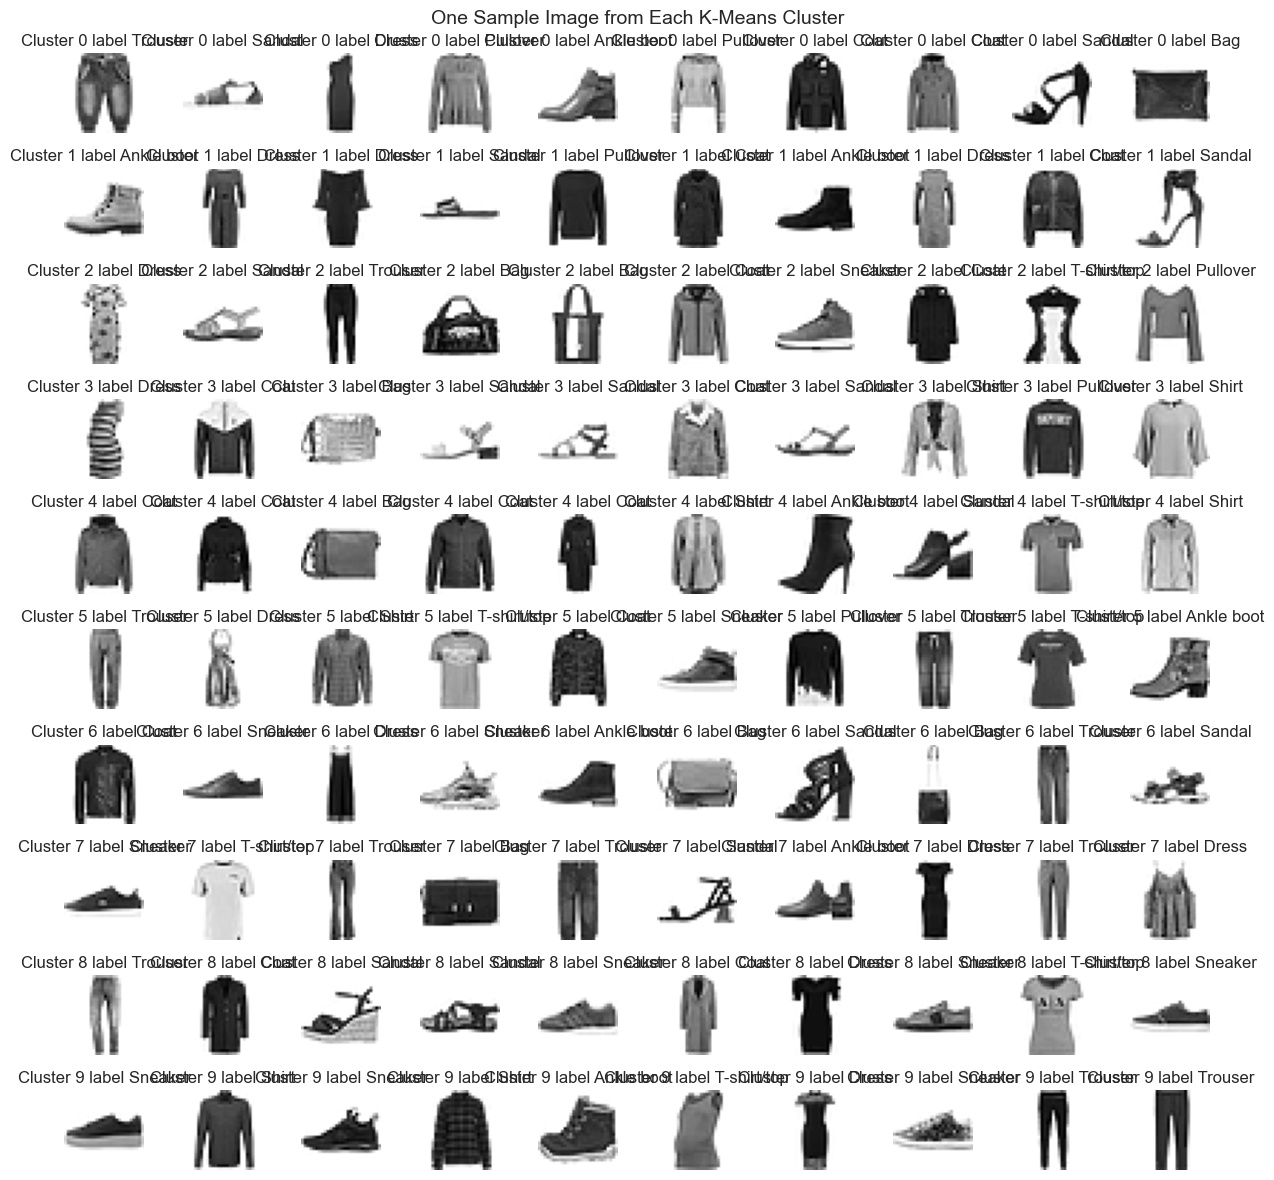

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find one representative image index from each cluster
sample_indices = dict()
num_clusters = 10
samples_per_cluster = 10

for cluster_id in range(10):
    indices = np.where(labels == cluster_id)[0]
    if indices.size > 0:
        sample_indices[cluster_id] = indices[:10] # take the first 10 sample from this cluster
    else:
        print(f"Warning: Cluster {cluster_id} has no assigned samples.")

# Safety check: must have 10 images
assert len(sample_indices) == 10, "Error: Some clusters have no samples."

# Step 2: Plot the images in a 2x5 grid
# fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# fig.suptitle('One Sample Image from Each K-Means Cluster', fontsize=14)
#

fig, axes = plt.subplots(num_clusters, samples_per_cluster, figsize=(12, 12))
fig.suptitle('One Sample Image from Each K-Means Cluster', fontsize=14)


for index, (key, value) in enumerate(sample_indices.items()):
    for col in range(samples_per_cluster):
        idx = sample_indices[index][col]
        image = (X.loc[idx,:].values).reshape(28,28)
        ax = axes[index][col]
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title(f'{LOOKUP[Y.loc[idx]]}')
        ax.axis('off')


# Plot example images from each cluster
# fig, axes = plt.subplots(10, 10, figsize=(10, 10))
#
# for cluster in range(model.n_clusters):
#     # Get indices of images in the current cluster
#     cluster_indices = np.where(labels == cluster)[0]
#     selected = cluster_indices[:10]  # Select first 10 images of the cluster
#
#     for i, img_idx in enumerate(selected):
#         ax = axes[cluster, i]
#         ax.imshow(X.loc[img_idx], cmap='gray')
#         ax.axis('off')

plt.tight_layout()
plt.show()


KeyError: np.int64(0)

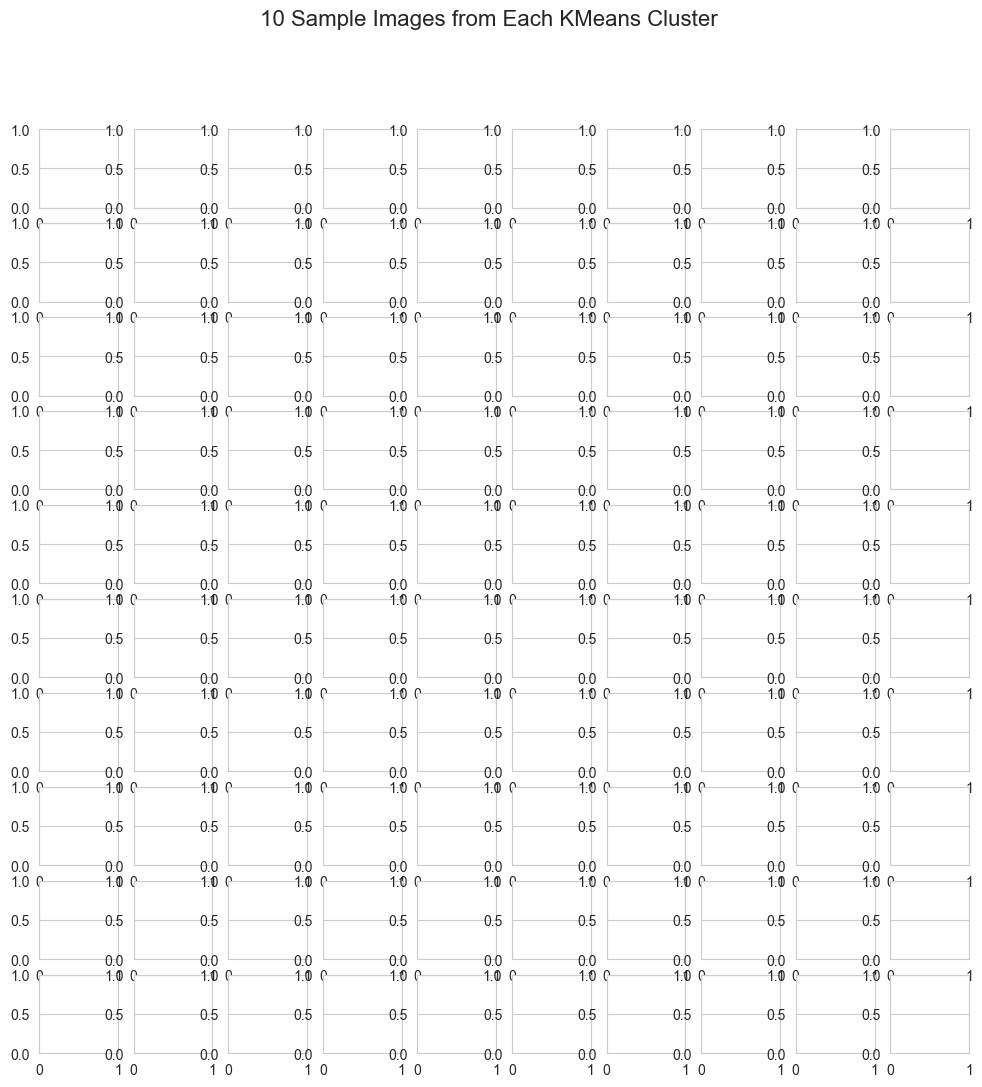

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters and samples per cluster
num_clusters = 10
samples_per_cluster = 10

# Step 1: Collect indices for 10 samples from each cluster
cluster_samples = []
for cluster_id in range(num_clusters):
    indices = np.where(model.labels_ == cluster_id)[0]
    if len(indices) >= samples_per_cluster:
        selected = indices[:samples_per_cluster]
    else:
        # pad with repeated indices if not enough samples
        selected = np.pad(indices, (0, samples_per_cluster - len(indices)), mode='wrap')
    cluster_samples.append(selected)

# Step 2: Plot 10x10 grid
fig, axes = plt.subplots(num_clusters, samples_per_cluster, figsize=(12, 12))
fig.suptitle('10 Sample Images from Each KMeans Cluster', fontsize=16)

# Make sure axes is a 2D array (even if matplotlib returns it as 1D)
axes = np.atleast_2d(axes)

for row in range(num_clusters):
    for col in range(samples_per_cluster):
        idx = cluster_samples[row][col]
        image = X[idx].reshape(28, 28)
        ax = axes[row][col]
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        if col == 0:
            ax.set_ylabel(f'Cluster {row}', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Actual label:  Sandal


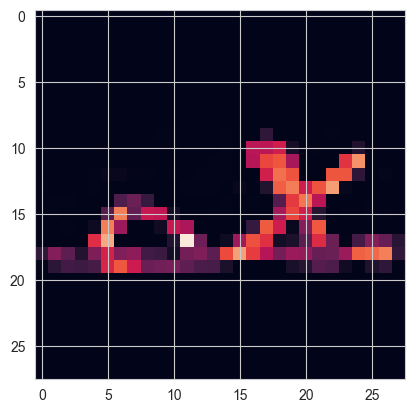

In [61]:
X.loc[5].values[:100]
display_image(X.loc[104].values, Y.loc[104])